# Stirring Minds Task:-

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
data=pd.read_csv("C:/Users/DELL/Downloads/datasets_2678_4448_KAG_conversion_data.csv")

# Data Preparation:- 

In [3]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
data.shape

(1143, 11)

**So 11 features with 1143 entries are there in the dataset.**

In [5]:
#checking if any missing value is there
data.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

**Hence no missing values are there. That's cool!**

In [6]:
#Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [8]:
#Taking a copy of the dataset to do further operations
df=data.copy()

In [9]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


**As we can see, 'age' is in range and 'gender' is a categorical column. So we have to convert them to continuous values for further calculations.**

In [10]:
#Checking the unique elements of 'age' column
df['age'].unique()


array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [11]:
#replace the range with average values
df['age']=df['age'].replace(['30-34','35-39','40-44','45-49'],[32,37,42,47])
df[['age']] = df[['age']].apply(pd.to_numeric) 

In [12]:
df['age']

0       32
1       32
2       32
3       32
4       32
        ..
1138    47
1139    47
1140    47
1141    47
1142    47
Name: age, Length: 1143, dtype: int64

In [13]:
#replace 'Male' with '0' and 'Female'with '1'
df['gender']=df['gender'].replace(['M','F'],[0,1])

In [14]:
df['gender']

0       0
1       0
2       0
3       0
4       0
       ..
1138    1
1139    1
1140    1
1141    1
1142    1
Name: gender, Length: 1143, dtype: int64

In [15]:
#checking types of columns
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                      int64
gender                   int64
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

Looking at the dataset, we can choose the relevant columns to work on further.

In [16]:
#taking important columns for processing
ds=df[['age','gender','interest','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']]

In [17]:
ds.head()

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,32,0,15,7350,1,1.43,2,1
1,32,0,16,17861,2,1.82,2,0
2,32,0,20,693,0,0.00,1,0
3,32,0,28,4259,1,1.25,1,0
4,32,0,28,4133,1,1.29,1,1


In [18]:
#creating some new calculated columns of our use
#How much amount is spent per click, i.e. SPC=Spent/Clicks
ds["SPC"]=df["Spent"]/df["Clicks"]
#How many impression turned into clicks, i.e. CPI%=(Clicks/Impressions)*100
ds["CPI"]=(df["Clicks"]/df["Impressions"])*100

<ipython-input-18-f26f086c052e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["SPC"]=df["Spent"]/df["Clicks"]
<ipython-input-18-f26f086c052e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["CPI"]=(df["Clicks"]/df["Impressions"])*100


In [19]:
#Checking the complete preprocessed dataset
ds.head()

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,SPC,CPI
0,32,0,15,7350,1,1.43,2,1,1.43,0.013605
1,32,0,16,17861,2,1.82,2,0,0.91,0.011198
2,32,0,20,693,0,0.00,1,0,NaN,0.000000
3,32,0,28,4259,1,1.25,1,0,1.25,0.023480
4,32,0,28,4133,1,1.29,1,1,1.29,0.024195


# Visualisations to get useful Insights:-

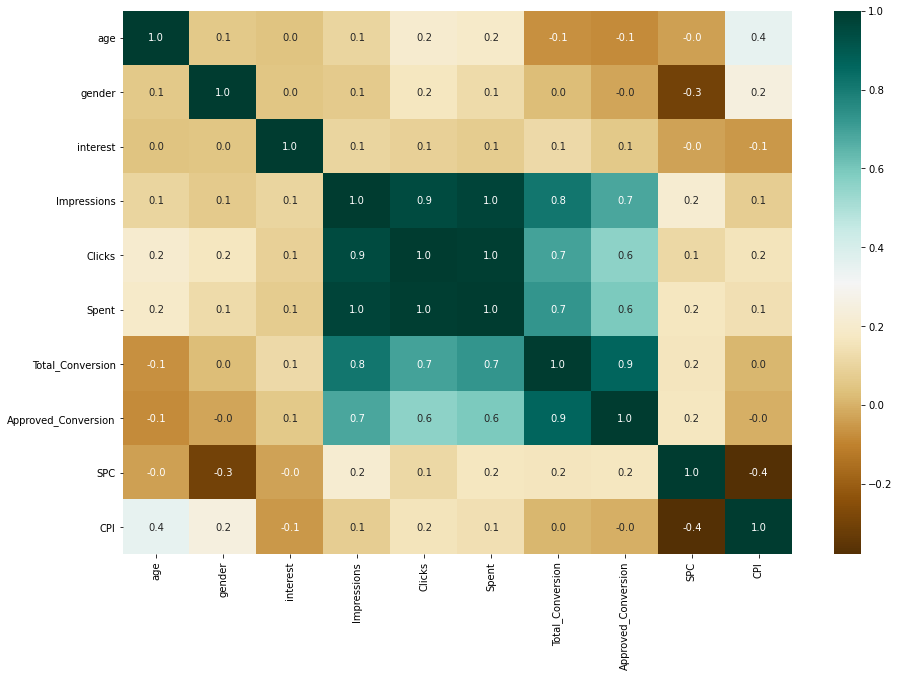

In [20]:
#Let's check the correlation between features using heatmap
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(ds.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")

**Observation:- As an expected result, we get great correlation between amount spent and the number of clicks or impressions. Which is followed by a good amount of correlation between impressions and total conversion or approved conversion. And we can see that maximum number of conversions has turned into Approved conversions. That's something very positive.**

# Let's check if we get any insight from relation of age with other columns:-

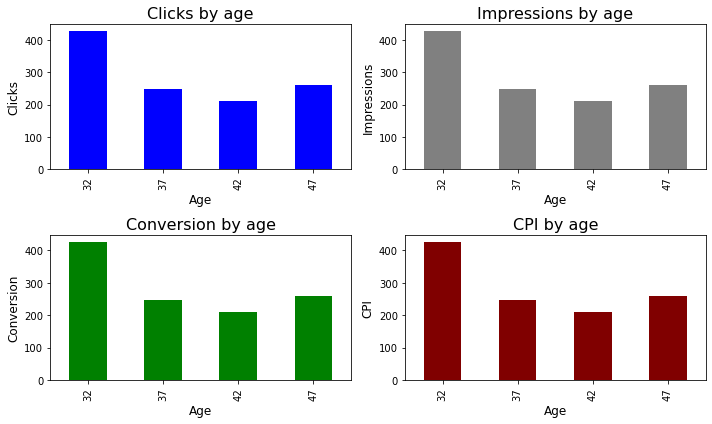

In [32]:
cba=ds.groupby("age")["Clicks"].count() #Clicks per age group
Iba=ds.groupby("age")["Impressions"].count() #Impressions per age group
conv_age=ds.groupby("age")["Total_Conversion"].count() #Conversions per age group
CPI_age=ds.groupby("age")["CPI"].count() #CPI per age group
plt.subplot(221)
ax = cba.plot(kind='bar', figsize=(10,6), color="blue", fontsize=10)
ax.set_title("Clicks by age", fontsize=16)
ax.set_xlabel("Age", fontsize=12);
ax.set_ylabel("Clicks", fontsize=12);
plt.subplot(222)
ix = Iba.plot(kind='bar', figsize=(10,6), color="gray", fontsize=10)
ix.set_title("Impressions by age", fontsize=16)
ix.set_xlabel("Age", fontsize=12);
ix.set_ylabel("Impressions", fontsize=12);
plt.subplot(223)
bx = conv_age.plot(kind='bar', figsize=(10,6), color="green", fontsize=10)
bx.set_title("Conversion by age", fontsize=16)
bx.set_xlabel("Age", fontsize=12);
bx.set_ylabel("Conversion", fontsize=12);
plt.subplot(224)
cx = CPI_age.plot(kind='bar', figsize=(10,6), color="maroon", fontsize=10)
cx.set_title("CPI by age", fontsize=16)
cx.set_xlabel("Age", fontsize=12);
cx.set_ylabel("CPI", fontsize=12);
plt.tight_layout()
plt.show()

**Observation:- So, the number of clicks, impressions as well as conversions are maximum in case of the age-group 30-34 and the least in case of 40-44 age-group. So as in case of CPI(as it depends on other features). Hence the campaign may be the most focused on the age group of 30-34.**

# Let's check if we get any insight from relation of gender & age together with other columns:-

**Observation:- So, in each case the numbers are more in case of Males(0) than Females(1).**

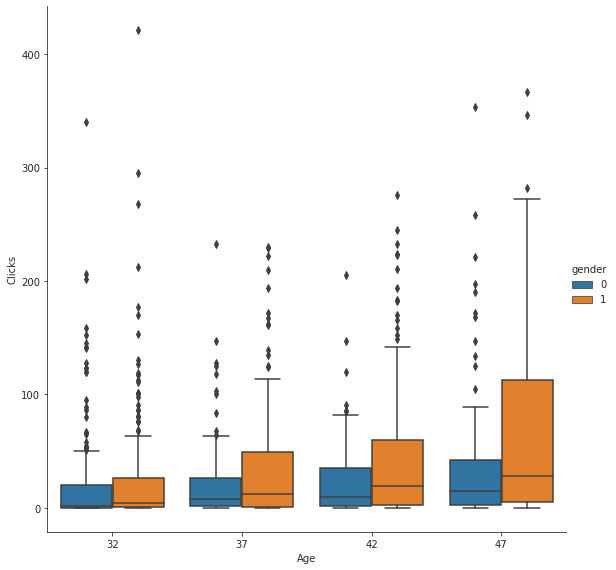

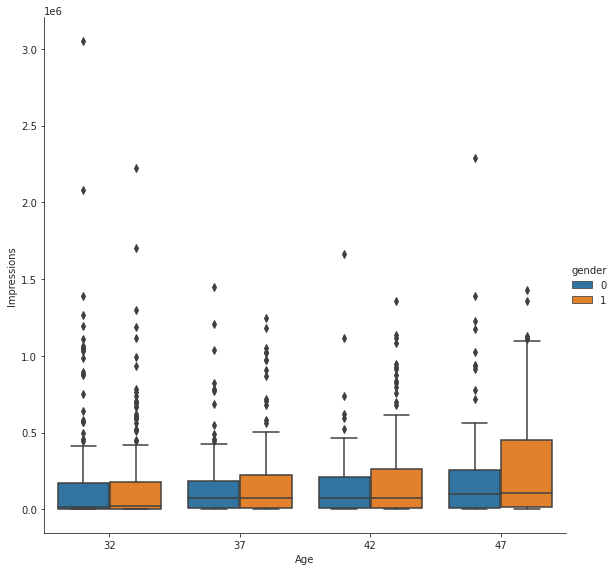

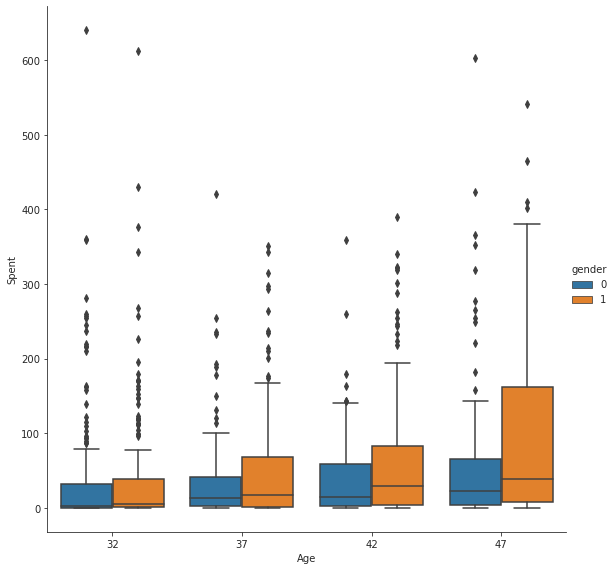

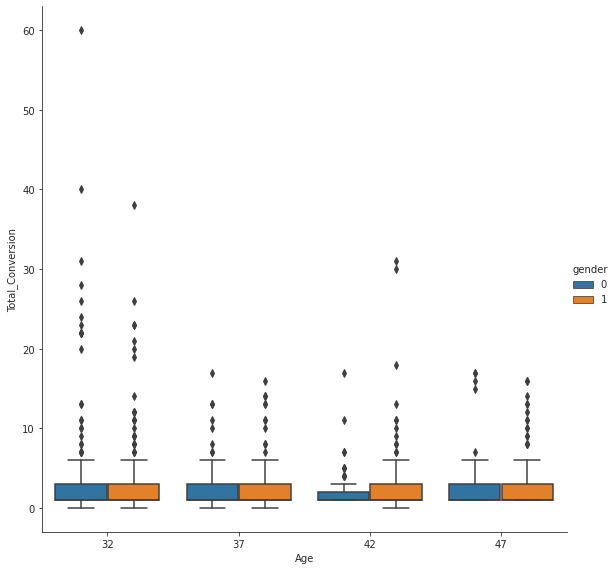

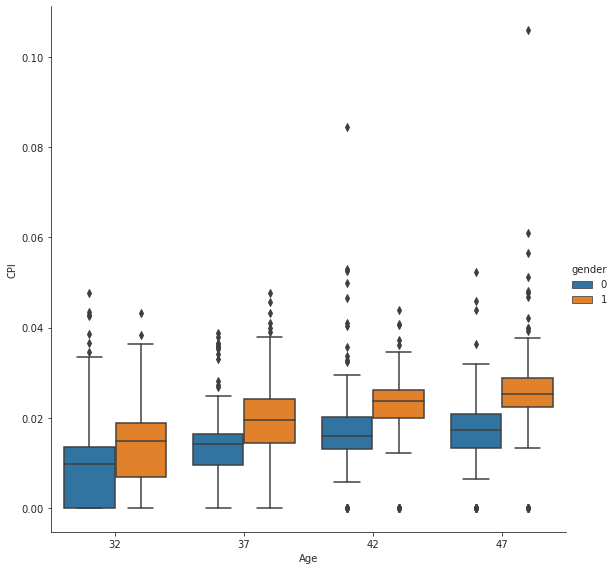

In [22]:
#Now let's try to find some relation between age, gender and other important parameters
for column in ds[['Clicks','Impressions','Spent','Total_Conversion','CPI']]:
    with sns.axes_style(style='ticks'):
             g = sns.catplot("age", column, "gender", data=ds, height=8, kind="box")
             g.set_axis_labels("Age", column);

**Observations- Now here we get some interesting stuff. From the first graph it's pretty clear that we have more clicks from Female customers than that of the Males in each of the age groups. But in case of Impressions, we are not focusing that much on the Female customers. Which has to be taken care of. It may increase the Conversion rates also, espcially, in the age group of 30-34, from where we are getting the maximum clicks. From the 3rd graph, it is seen that in some cases we are spending more in Males that Females, which is to be completely reversed. In each and every age group, the investment should be more upon Female customers.
Which is most interesting here, that is the total conversion. Here we see similar trends in 30-34, 35-39 and 45-49 years age group. But in 40-44, Females are ahead. I think, if we can focus on the improvement of previously mentioned features, we will also get more conversions from more Female candidates.Clicks per Impression plot also says the same story of Female dominance. These are some very very useful insights for sure.**

In [23]:
#Checking the unique Campaign IDs
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178], dtype=int64)

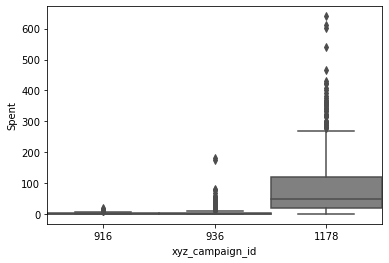

In [24]:
#Let's Check the amount spent on each Campaign
sns.boxplot(x='xyz_campaign_id', y='Spent',data=df, color='gray', width=1)

**Observation:- Highest amount spent on the campaign with ID 1178. So let us focus on that campaign separately.**

# Analysing the Campaign with Campaign_ID= 1178

In [25]:
#Storing the 1178 campaign stats in a different dataframe
df_1178=df.loc[df['xyz_campaign_id'] == 1178]

In [26]:
df_1178.shape

(625, 11)

In [27]:
df_1178.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
518,1121091,1178,144531,32,0,10,1194718,141,254.049996,28,14
519,1121092,1178,144531,32,0,10,637648,67,122.400000,13,5
520,1121094,1178,144531,32,0,10,24362,0,0.000000,1,1
521,1121095,1178,144531,32,0,10,459690,50,86.330001,5,2
522,1121096,1178,144531,32,0,10,750060,86,161.909999,11,2


In [28]:
df_1178=df_1178.drop(['xyz_campaign_id'],axis=1)

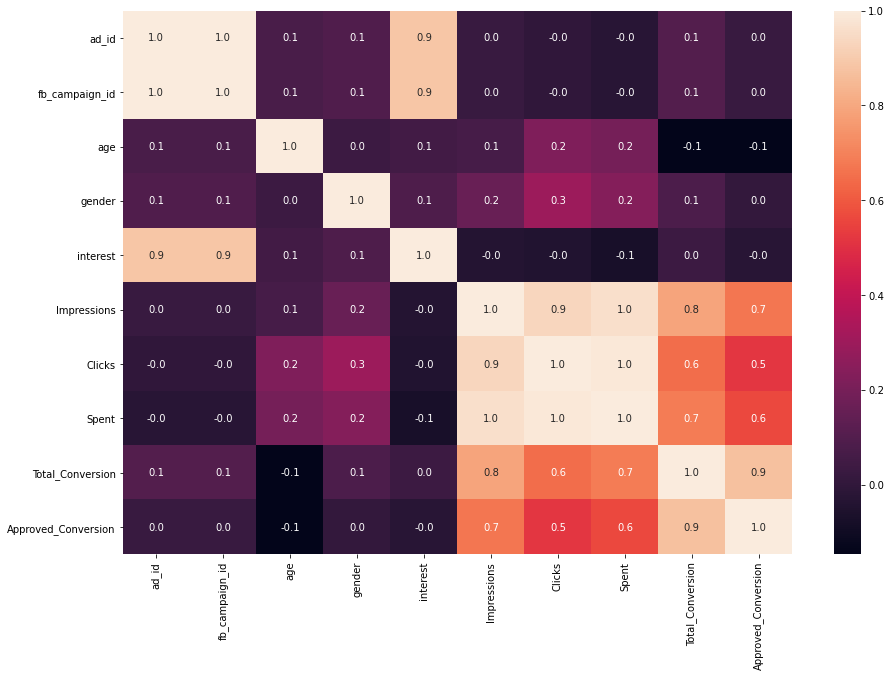

In [29]:
#Check the correlation heatmap
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_1178.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax)

**Nearly a similar graph we are getting here like the heatmap of the main dataset.**

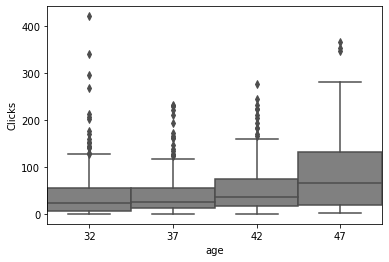

In [30]:
#Let us get the insights based on age
sns.boxplot(x='age', y='Clicks',data=df_1178, color='gray', width=1)

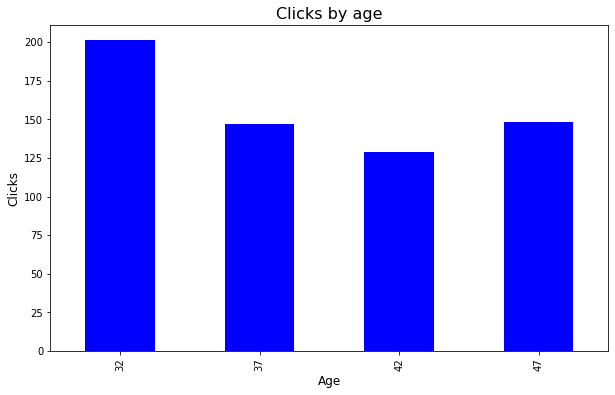

In [31]:
cbag=df_1178.groupby("age")["Clicks"].count()
ax = cbag.plot(kind='bar', figsize=(10,6), color="blue", fontsize=10)
ax.set_title("Clicks by age", fontsize=16)
ax.set_xlabel("Age", fontsize=12);
ax.set_ylabel("Clicks", fontsize=12);
plt.show()

**Observation:- Here is also a similar story, like the age group of 30-34 are ahead of all. So it is pretty confirmed that our target audience should be the same.**

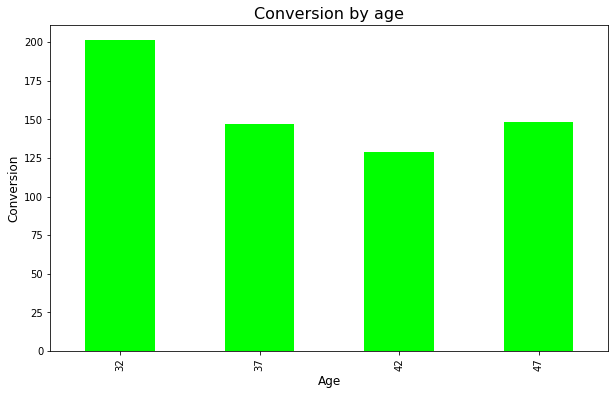

In [33]:
#Let's check the conversion for different age groups
conv_ages=df_1178.groupby("age")["Total_Conversion"].count() #Conversions per age group
bx = conv_ages.plot(kind='bar', figsize=(10,6), color="lime", fontsize=10)
bx.set_title("Conversion by age", fontsize=16)
bx.set_xlabel("Age", fontsize=12);
bx.set_ylabel("Conversion", fontsize=12);

**So the same trend reflects here also. Confirms the validity of our previous observation.**

# Now let's get the insights based on both age and gender in df_1178...

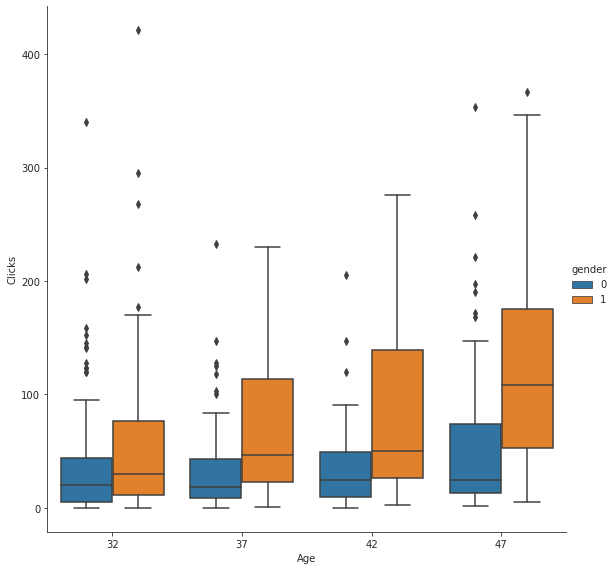

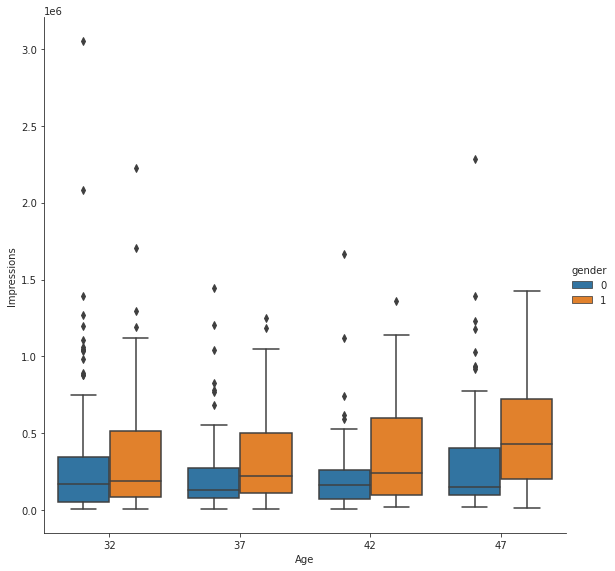

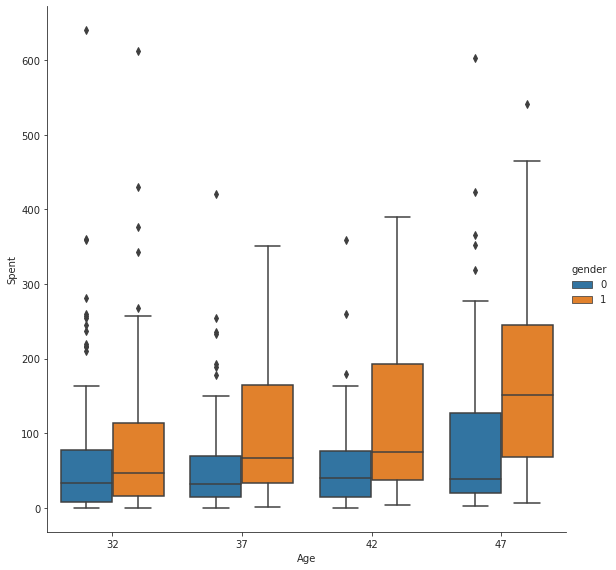

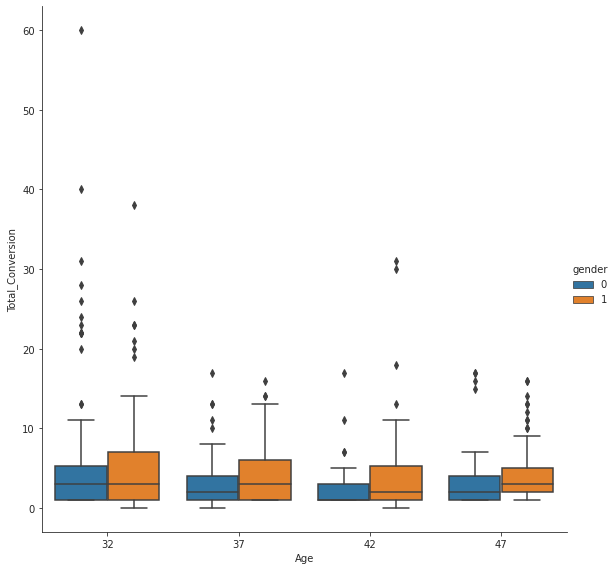

In [34]:
for column in df_1178[['Clicks','Impressions','Spent','Total_Conversion']]:
    with sns.axes_style(style='ticks'):
             g = sns.catplot("age", column, "gender", data=df_1178, height=8, kind="box")
             g.set_axis_labels("Age", column);
        

**Observation:- It is very much clear from the above graphs that in each and every aspect the female customers are pretty ahead than the males. Hence it is now an established fact that, in each age group, we have to focus more on the female customers and we should try to increase our impact on male customers as much as we can. Specially in the age groups of 30-34 the conversion rate is really good in male as well as female customers, so we should stress upon that. By increasing the Impressions, we can increase the Clicks and the conversion rate would increase similarly.**

# Now at last we will try to find the optimum number of clusters from the data set!

In [35]:
ds1=df[['xyz_campaign_id','age','gender','interest','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']]

Text(0.5, 1.0, 'Elbow Method Visualisation')

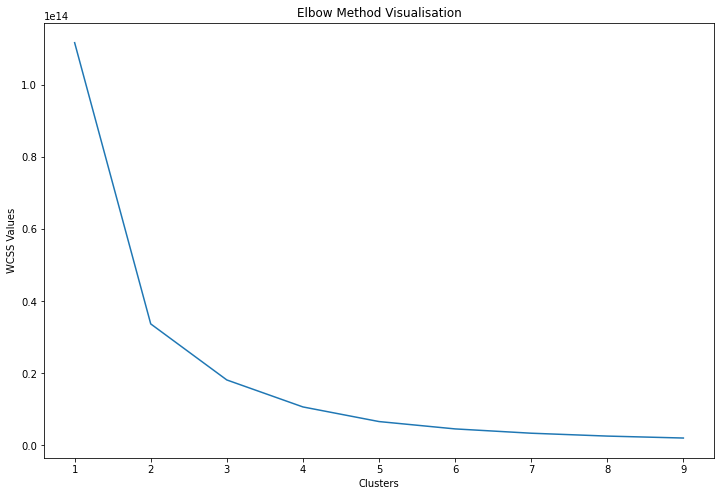

In [36]:
#Using Elbow method!
from sklearn.cluster import KMeans
wcss=[]
K_rng=10

for i in range(1,K_rng):
    K=KMeans(i)
    K.fit(ds1)
    w=K.inertia_
    wcss.append(w)
    
Clusters=range(1,K_rng)
plt.figure(figsize=(12,8))
plt.plot(Clusters,wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS Values') #Within Cluster Sum of Squares
plt.title('Elbow Method Visualisation')

Oservation:- The Elbow method graph suggests the optimum cluster region to be from 2 to 4. So we can proceed with these only.

# For K=2

In [37]:
#Fitting the model
K2= KMeans(2)
K2.fit(ds1)

KMeans(n_clusters=2)

In [38]:
#Prediction using the model
ds1_pred=ds1.copy()
ds1_pred['Predicted']=K2.fit_predict(ds1)

Text(0.5, 1.0, 'Clicks VS Conversion(K=2)')

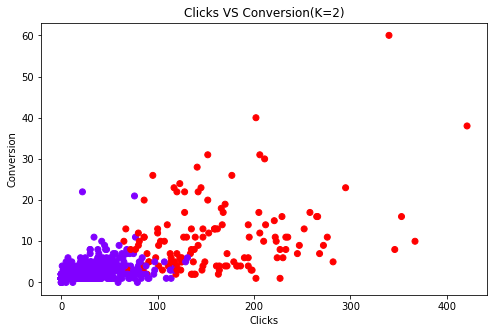

In [40]:
#Visualise the clusters (Clicks and Conversion) after prediction
plt.figure(figsize=(8,5))
plt.scatter(ds1_pred['Clicks'], ds1_pred['Total_Conversion'], c=ds1_pred['Predicted'], cmap = 'rainbow')
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.title('Clicks VS Conversion(K=2)')

Text(0.5, 1.0, 'Impressions VS Clicks(K=2)')

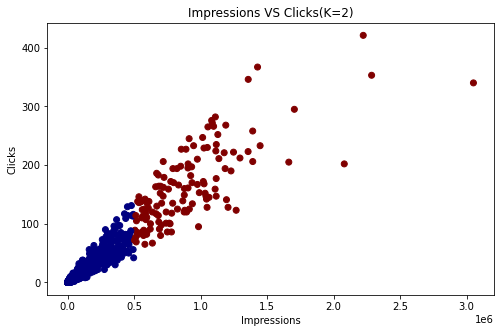

In [41]:
#Visualise the clusters (Impressions and Clicks) after prediction
plt.figure(figsize=(8,5))
plt.scatter(ds1_pred['Impressions'], ds1_pred['Clicks'], c=ds1_pred['Predicted'], cmap = 'jet')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.title('Impressions VS Clicks(K=2)')

# For K=3

In [42]:
#Fitting the model
K3= KMeans(3)
K3.fit(ds1)

KMeans(n_clusters=3)

In [44]:
#Prediction using the model
ds1_pred2=ds1.copy()
ds1_pred2['Predicted']=K3.fit_predict(ds1)

Text(0.5, 1.0, 'Clicks VS Conversion(K=3)')

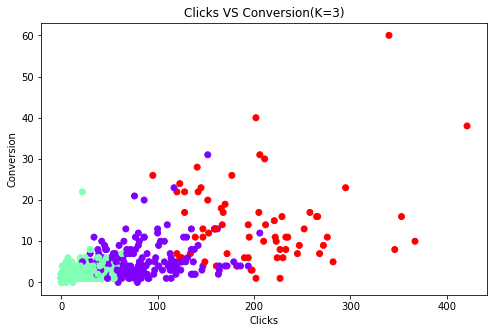

In [45]:
#Visualise the clusters (Clicks and Conversion) after prediction
plt.figure(figsize=(8,5))
plt.scatter(ds1_pred2['Clicks'], ds1_pred2['Total_Conversion'], c=ds1_pred2['Predicted'], cmap = 'rainbow')
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.title('Clicks VS Conversion(K=3)')

Text(0.5, 1.0, 'Impressions VS Clicks(K=3)')

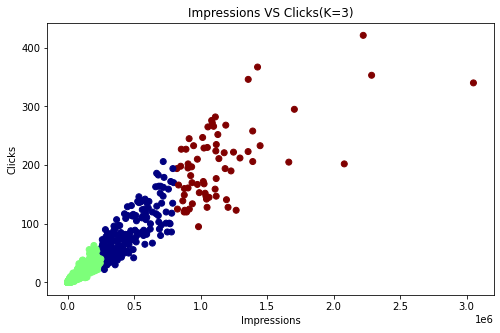

In [46]:
#Visualise the clusters (Impressions and Clicks) after prediction
plt.figure(figsize=(8,5))
plt.scatter(ds1_pred2['Impressions'], ds1_pred2['Clicks'], c=ds1_pred2['Predicted'], cmap = 'jet')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.title('Impressions VS Clicks(K=3)')

# For K=4

In [47]:
#Fitting the model
K4= KMeans(4)
K4.fit(ds1)

KMeans(n_clusters=4)

In [48]:
#Prediction using the model
ds1_pred3=ds1.copy()
ds1_pred3['Predicted']=K4.fit_predict(ds1)

Text(0.5, 1.0, 'Clicks VS Conversion(K=4)')

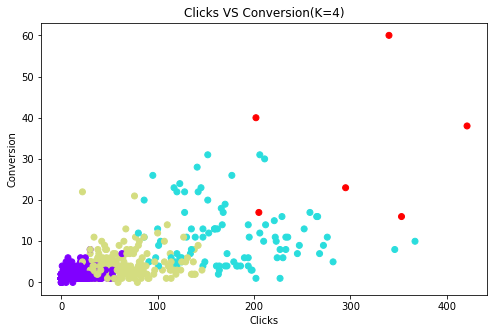

In [51]:
#Visualise the clusters (Clicks and Conversion) after prediction
plt.figure(figsize=(8,5))
plt.scatter(ds1_pred3['Clicks'], ds1_pred3['Total_Conversion'], c=ds1_pred3['Predicted'], cmap = 'rainbow')
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.title('Clicks VS Conversion(K=4)')

Text(0.5, 1.0, 'Impressions VS Clicks(K=4)')

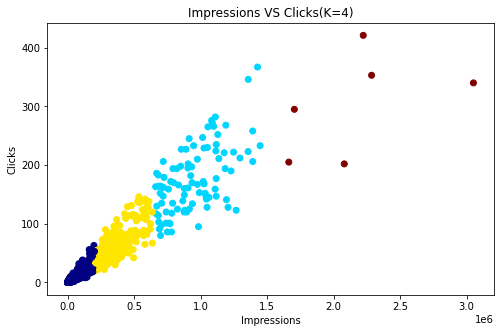

In [52]:
#Visualise the clusters (Impressions and Clicks) after prediction
plt.figure(figsize=(8,5))
plt.scatter(ds1_pred3['Impressions'], ds1_pred3['Clicks'], c=ds1_pred3['Predicted'], cmap = 'jet')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.title('Impressions VS Clicks(K=4)')

**Observation:- From the analyses above it can be stated that optimum number of clusters are 3. This will help us to be focusted in the manner, that will help the company to progress further. Impressions VS Clicks are pretty good to observe in 3 clusters where the Clicks VS Conversion is a bit confusing.** 

# Final Observation & Colclusion:-

**It is clearly observed that the company should focus mainly upon the age group of 30-34 as most of their revenues are generating from that age group only. Beside it, steps are to be taken to increase the impact of the adds upon other age groups also. Another interesting thing to be considered is the gender. In each and every case we have seen that females are more productive for the organisation than that of the male customers. Hence here also the focus should be kept accordingly. Last but not the list we have found the optimum number of cluters to be 3 by Elbow method. Keeping all these important aspects in mind the company can build upon these insights to progress more.
Thank you.**

# END